In [1]:
# import packages

import numpy as np
import pandas as pd
from math import log2
import plotly.plotly as py
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Data Read and Process

In [2]:
## Define data process funcitons:

#standardize
def Std(dataframe):
    values = np.array(dataframe.values)
    values_norm = [(x-np.mean(x))/(np.std(x)+0.0001) for x in values]
    dataframe_std = pd.DataFrame(values_norm, columns = dataframe.columns, index = dataframe.index)
    return(dataframe_std)

In [3]:
# Read IR dataset
def read_table(filename):
    data = pd.read_table(filename)
    data = data[['gene_id','gene_CIR_read_count','gene_CER_read_count',
                           'gene_CIR_RPKM','gene_CER_RPKM','gene_IRI']]

    data = data.sort_values('gene_CIR_RPKM',ascending= False).set_index('gene_id').replace([np.inf, -np.inf], np.nan).dropna()
    data = data[data.gene_IRI != 0]
    data = data[data.gene_IRI < 1]
    data = data[data.gene_CER_RPKM > 1]
    data = pd.DataFrame(data)
    return (data)

def read_csv(filename):
    data = pd.read_csv(filename,delimiter=',')
    data = data[['gene_id','gene_CIR_read_count','gene_CER_read_count',
                           'gene_CIR_RPKM','gene_CER_RPKM','gene_IRI']]

    data = data.sort_values('gene_CIR_RPKM',ascending= False).set_index('gene_id').replace([np.inf, -np.inf], np.nan).dropna()
    data = data[data.gene_IRI != 0]
    data = data[data.gene_IRI < 1]
    data = data[data.gene_CER_RPKM > 1]
    data = pd.DataFrame(data)
    return (data)

     
L140_IR_sorted = read_csv('L140_sorted.quant.IRI.genes.csv')
L149_IR_sorted = read_csv('L149_sorted.quant.IRI.genes.csv')
L062_IR_sorted = read_csv('L062_sorted.quant.IRI.genes.csv')
N048_IR_sorted = read_csv('N048_sorted.quant.IRI.genes.csv')
N068_IR_sorted = read_table('N068_sorted.quant.IRI.genes.csv')
N090_IR_sorted = read_csv('N090_sorted.quant.IRI.genes.csv')
N098_IR_sorted = read_table('N098_sorted.quant.IRI.genes.csv')
L005_IR_sorted = read_table('L005_sorted.quant.IRI.genes.csv')
L027_IR_sorted = read_table('L027_sorted.quant.IRI.genes.csv')
L031_IR_sorted = read_table('L031_sorted.quant.IRI.genes.csv')
L072_IR_sorted = read_csv('L072_sorted.quant.IRI.genes.csv')
L074_IR_sorted = read_table('L074_sorted.quant.IRI.genes.csv')
L078_IR_sorted = read_table('L078_sorted.quant.IRI.genes.csv')
L102_IR_sorted = read_table('L102_sorted.quant.IRI.genes.csv')
L115_IR_sorted = read_csv('L115_sorted.quant.IRI.genes.csv')
L133_IR_sorted = read_table('L133_sorted.quant.IRI.genes.csv')
L137_IR_sorted = read_table('L137_sorted.quant.IRI.genes.csv')

In [4]:
#Build function to get intersection dataframe for all samples
Data_list = [L140_IR_sorted,L149_IR_sorted,L062_IR_sorted,N048_IR_sorted,
             N068_IR_sorted,N090_IR_sorted,N098_IR_sorted,L005_IR_sorted,
             L027_IR_sorted,L031_IR_sorted,L072_IR_sorted,L074_IR_sorted,
             L078_IR_sorted,L102_IR_sorted,L115_IR_sorted,L133_IR_sorted,
            L137_IR_sorted]

Name_list = ['L140','L149','L062','N048','N068','N090','N098','L005','L027','L031','L072',
             'L074','L078','L102','L115','L133','L137']

#define function
def get_dataframe(datalist, name_list, column_name):
    gene_list = []
    data_list = []
    #get overlap gene list of all 16 samples
    for data in datalist:
        gene = data.index.tolist()
        gene_list.append(gene)
    gene_list = set.intersection(*map(set,gene_list))
    
    for data in datalist:
        data = data.loc[gene_list]
        data = data[column_name].values.tolist()
        data_list.append(data)
        
    dataframe = pd.DataFrame(data_list).transpose()
    dataframe.columns = Name_list 
    dataframe.index = gene_list
    return(dataframe)

In [14]:
# get IRI dataset for all samples and get stadnardized IRI dataset
Data_IRI = get_dataframe(Data_list,Name_list,'gene_IRI')
Data_IRI.to_csv('Data_IRI.csv')

#get gene list
IRI_Gene_List = Data_IRI.index.values.tolist()

Data_IRI_Std = Std(Data_IRI)
Data_IRI_Std.head(2)


,L140,L149,L062,N048,N068,N090,N098,L005,L027,L031,L072,L074,L078,L102,L115,L133,L137
AKR1B1,2.275980,1.121546,0.698359,0.342605,-0.051539,1.105617,1.440852,-0.866165,-0.809855,-1.003399,-0.400734,-0.815075,-0.957175,-0.694115,-0.995189,-0.594280,0.202566
DDX31,1.576893,2.706950,0.725431,-0.926769,-0.755028,-0.142468,-0.684563,-0.770882,0.223951,-0.274375,-0.305266,0.507360,-0.091804,-0.650611,0.031687,0.050074,-1.220581


# Build PCA

In [7]:
# get inputs fro PCA
X_T_IRI_Std = Data_IRI_Std.values.T.tolist()

Y_T_IRI = Data_IRI.columns.tolist()
Y_T_IRI_Names = Y_T_IRI
Y_T_IRI = [1,1,2,0,0,0,0,2,1,2,1,1,1,1,1,1,1]
Y_T_IRI  = np.asarray(Y_T_IRI)

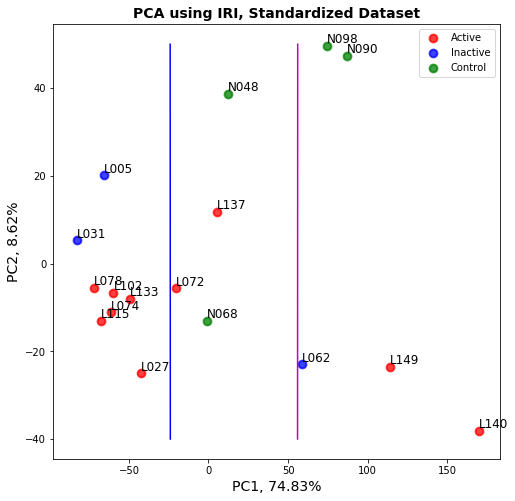

Explained variance ration
[0.74825018 0.08616396]


In [8]:
# build PCA on IRI Std Dataset
#whole gene IRI PCA on T-cell, Standardized Dataset
X_T_IRI_Std_pca = PCA(n_components=2)
X_T_IRI_Reduced_Std = X_T_IRI_Std_pca.fit_transform(X_T_IRI_Std)
colors = ['red','blue','green']
target_names = ['Active','Inactive','Control']
    
plt.figure(figsize=(8,8))
for color, i, target_name in zip(colors, [1, 2, 0], target_names):
    plt.scatter(X_T_IRI_Reduced_Std[Y_T_IRI == i, 0], X_T_IRI_Reduced_Std[Y_T_IRI == i, 1],
                    color=color, lw = 2, label=target_name, alpha=0.75, s = 60,marker='o')

for i, txt in enumerate(Y_T_IRI_Names):
    plt.text(X_T_IRI_Reduced_Std[i][0], X_T_IRI_Reduced_Std[i][1], txt, fontsize=12,
            verticalalignment='bottom',horizontalalignment='left')

plt.title("PCA using IRI, Standardized Dataset", fontsize = 14, fontweight = 'bold')
plt.legend()
plt.plot([56,56.1],[-40, 50], '-m' )
plt.plot([-24,-24.1],[-40, 50], '-b' )

plt.xlabel('PC1, 74.83%',fontsize = 14)
plt.ylabel('PC2, 8.62%',fontsize = 14)

plt.savefig("PCA using IRI, Standardized Dataset.png", bbox_inches='tight', dpi=400)


plt.show()
print('Explained variance ration')
print(X_T_IRI_Std_pca.explained_variance_ratio_)

Eignevalues 1: 5731.773472894479
Eignevalues 2: 660.0363607180838
Eignevalues 3: 222.42663502109022
 
Explained variance ration
[0.74825018 0.08616396 0.02903652 0.02613276 0.02131267]


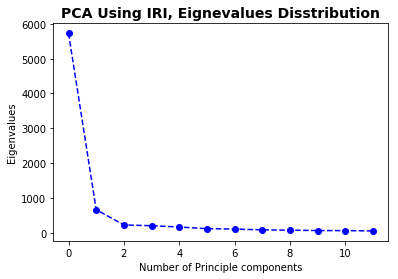

In [9]:
# get Eigenvalues distribution and check big drop from PC1 to PC2
# analysize eigenvalue trend, WG_T_sp_Raw
pca_IRI_T_Std_igen = PCA(n_components=12)
X_T_Reduced_igen = pca_IRI_T_Std_igen.fit_transform(X_T_IRI_Std)
eigen_values_list = pca_IRI_T_Std_igen.explained_variance_
print('Eignevalues 1:', eigen_values_list[0])
print('Eignevalues 2:', eigen_values_list[1])
print('Eignevalues 3:', eigen_values_list[2])
print(' ')
print('Explained variance ration')
print(pca_IRI_T_Std_igen.explained_variance_ratio_[:5])

plt.ylabel('Eigenvalues')
plt.xlabel('Number of Principle components')
plt.title('PCA Using IRI, Eignevalues Disstribution',
          fontsize = 14, fontweight = 'bold')

plt.style.context('seaborn-whitegrid')

plt.plot(eigen_values_list, color='blue', marker='o', linestyle='dashed')

plt.savefig("PCA using IRI,Eignevalue.png", bbox_inches='tight', dpi=400)

plt.show()

Eigenvectors distribution:


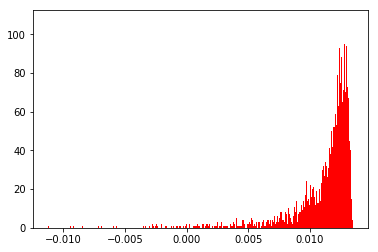

In [10]:
# get Eigenvector distribution
print('Eigenvectors distribution:')
plt.hist(X_T_IRI_Std_pca.components_[0], color = 'r', bins = 1000)
plt.show()

# Analysis PCA 

In [12]:
# define functions to locate gene along PC

#Get top genes on positive side
def up_locate_gene(PC, up_range, Gene_List):
    PC = PC.tolist()
    Locate = {}
    Up_PC_Gene_List = []
    for i in PC:
        if i > up_range:
            Locate.update({Gene_List[PC.index(i)]:i})
            Up_PC_Gene_List.append(Gene_List[PC.index(i)])
    return(Locate,Up_PC_Gene_List)


#Get top genes on negative side
def bottom_locate_gene(PC, down_range, Gene_List):
    PC = PC.tolist()
    Locate = {}
    Bottom_PC_Gene_List = []
    for i in PC:
        if i < down_range:
            Locate.update({Gene_List[PC.index(i)]:i})
            Bottom_PC_Gene_List.append(Gene_List[PC.index(i)])
    return(Locate,Bottom_PC_Gene_List)

In [15]:
#get PC1 structure

X_T_IRI_Std_pca_PC1 = X_T_IRI_Std_pca.components_[0]
print('Max in PC1:',X_T_IRI_Std_pca_PC1.max())
print('Min in PC1:',X_T_IRI_Std_pca_PC1.min())
print('# below 0:', len(bottom_locate_gene(X_T_IRI_Std_pca_PC1,-0.001,IRI_Gene_List)[0]))

Max in PC1: 0.013479838433660558
Min in PC1: -0.011220785786141354
# below 0: 58


In [16]:
#get top genes on positive side 
Locate_00133_IRI_T_Std_PC1 = up_locate_gene(X_T_IRI_Std_pca_PC1, 0.0133, IRI_Gene_List)
A_00133 = Locate_00133_IRI_T_Std_PC1[0]
A_00133 = pd.DataFrame.from_dict(A_00133,orient = 'index')
A_00133.columns = ['Eigenvector_value']
A_00133.to_csv('Std_T_IRI_PC1_00133.csv')
print('Shape:', A_00133.shape)

IRI_Std_PCA_00133 = A_00133.merge( Data_IRI_Std,right_index=True,left_index=True)
IRI_Std_PCA_00133.columns = [['Eigenvector_value','L140_IRI','L149_IRI','L062_IRI','N048_IRI','N068_IRI','N090_IRI',
                             'N098_IRI','L005_IRI','L027_IRI','L031_IRI','L072_IRI','L074_IRI','L078_IRI',
                             'L102_IRI','L115_IRI','L133_IRI','L137_IRI']]
IRI_Std_PCA_00133.head(2)
#IRI_Std_PCA_00133.to_csv('IRI_Std_PCA_00133.csv')

Shape: (114, 1)


,Eigenvector_value,L140_IRI,L149_IRI,L062_IRI,N048_IRI,N068_IRI,N090_IRI,N098_IRI,L005_IRI,L027_IRI,L031_IRI,L072_IRI,L074_IRI,L078_IRI,L102_IRI,L115_IRI,L133_IRI,L137_IRI
PNPLA2,0.013388,1.993245,1.583367,1.154207,0.316915,0.199048,1.076072,1.179581,-0.952710,-0.884912,-1.078615,-0.468569,-0.898932,-0.867693,-0.850086,-0.826731,-0.636714,-0.037476
LMBRD2,0.013358,2.497363,1.441931,0.889234,0.286244,0.180925,0.922261,0.731165,-0.874958,-0.804738,-1.117493,-0.070487,-0.686241,-0.961628,-0.775308,-0.993557,-0.695722,0.031009


In [19]:
#get botton genes on PC1 on negative side

Locate_B_55_IRI_T_Std_PC1 = bottom_locate_gene(X_T_IRI_Std_pca_PC1,-0.001,IRI_Gene_List)
A_B_55 = Locate_B_55_IRI_T_Std_PC1[0]
A_B_55 = pd.DataFrame.from_dict(A_B_55,orient = 'index')
A_B_55.columns = ['Eigenvector_value']
#A_B_55.to_csv('Std_T_IRI_PC1_B_55.csv')
print('Shape:', A_B_55.shape)


IRI_Std_PCA_TBB_55 = A_B_55.merge( Data_IRI_Std,right_index=True,left_index=True)
IRI_Std_PCA_TBB_55.columns = [['Eigenvector_value','L140_IRI','L149_IRI','L062_IRI','N048_IRI','N068_IRI','N090_IRI',
                             'N098_IRI','L005_IRI','L027_IRI','L031_IRI','L072_IRI','L074_IRI','L078_IRI',
                             'L102_IRI','L115_IRI','L133_IRI','L137_IRI']]
IRI_Std_PCA_TBB_55.head(2)
#IRI_Std_PCA_TBB_55.to_csv('IRI_Std_PCA_B_58.csv')


Shape: (58, 1)


,Eigenvector_value,L140_IRI,L149_IRI,L062_IRI,N048_IRI,N068_IRI,N090_IRI,N098_IRI,L005_IRI,L027_IRI,L031_IRI,L072_IRI,L074_IRI,L078_IRI,L102_IRI,L115_IRI,L133_IRI,L137_IRI
CHST11,-0.001009,0.156068,-0.150249,-0.231562,-0.341406,-0.180381,-0.266795,-0.349712,-0.489938,3.796005,-0.463629,-0.308602,-0.335216,-0.096952,-0.244860,0.084254,-0.279485,-0.297541
PHF20,-0.003017,-0.117520,-0.184314,-0.456272,-0.053261,-0.588357,-0.174374,0.167836,1.947639,-0.482173,1.777443,-0.625146,-0.814908,-0.769724,-0.795889,2.261603,-0.767154,-0.325428
